# Whelks and lobsters -- split context

## The system

In [1]:
from ulbc.symbolic import var

In [2]:
from ulbc.interval_utils import fintervals

In [3]:
x, y = var("x", "y")

In [4]:
from ulbc import *

In [5]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = vector([RIF(1,1.2), RIF(4,6)])

In [6]:
v3 = vector([RIF(1,1.1), RIF(4,5)])

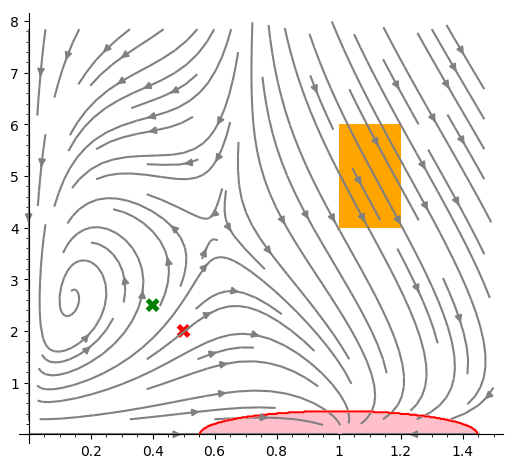

In [7]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

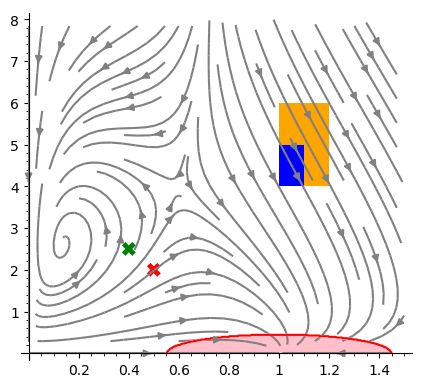

In [8]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='blue')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [9]:
v3s = vector([RIF(0, 0.1), RIF(0, 1)]); fintervals(v3s)

'[[0.0000000000000000 .. 0.10000000000000001], [0 .. 1]]'

In [10]:
v2b = v3 + v3s; fintervals(v2b)

'[[1.0000000000000000 .. 1.2000000000000002], [4 .. 6]]'

In [11]:
[(a.str(style='brackets'), b.str(style='brackets'))
 for (a, b) in list(zip(v3, v3s))]

[('[1.0000000000000000 .. 1.1000000000000001]',
  '[0.0000000000000000 .. 0.10000000000000001]'),
 ('[4.0000000000000000 .. 5.0000000000000000]',
  '[0.0000000000000000 .. 1.0000000000000000]')]

In [12]:
from ulbc.bondcalculus import System

In [13]:
sys = System(SR, us, v2, vf)

## Reach initials tests

In [14]:
from flowstar.reachability import Reach

def compute_reach(y0, y0_ctx=None):
    return sys.with_y0(y0, y0_ctx).reach(20,
                 order=5, step=(0.01, 0.5),
                 precondition=1,
                 estimation=1e-3,
                 integrationScheme=2,
                 cutoff_threshold=1e-7)

In [15]:
reach = compute_reach(v2)

calling reach with y0 = ['[1.0000000000000000 .. 1.2000000000000000]', '[4.0000000000000000 .. 6.0000000000000000]']
ode in symbolic ring
str_odes = ['x + [-0.800000000000000, -0.800000000000000]*x*y*[0.300000000000000, 0.300000000000000] + x + [-1.00000000000000, -1.00000000000000]*x*[-0.600000000000000, -0.600000000000000]', 'x + [-0.800000000000000, -0.800000000000000]*x*y*[-2.00000000000000, -2.00000000000000] + y + [1.00000000000000, 1.00000000000000]*y*[-0.0500000000000000, -0.0500000000000000]']
run = True
_handle_initials called!
C = [1.0..1.2]
C = [4.0..6.0]
initials = (1.1?, 5.?)


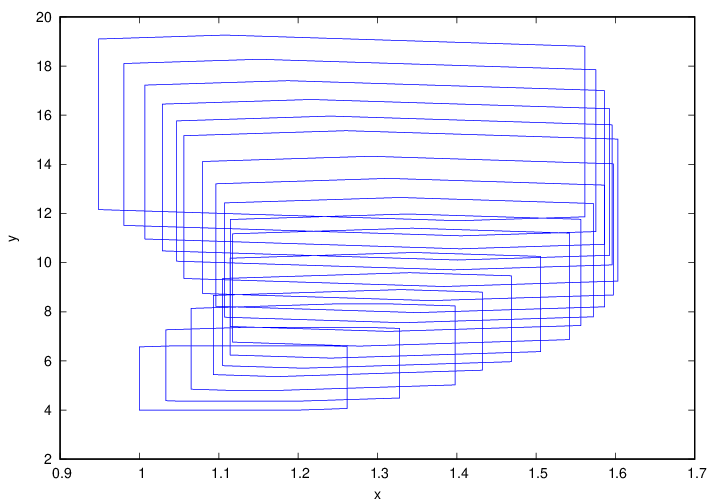

In [16]:
reach.wplot('x', 'y')

calling reach with y0 = ['[1.0000000000000000 .. 1.1000000000000001]', '[4.0000000000000000 .. 5.0000000000000000]']
ode in symbolic ring
str_odes = ['x + [-0.800000000000000, -0.800000000000000]*x*y*[0.300000000000000, 0.300000000000000] + x + [-1.00000000000000, -1.00000000000000]*x*[-0.600000000000000, -0.600000000000000]', 'x + [-0.800000000000000, -0.800000000000000]*x*y*[-2.00000000000000, -2.00000000000000] + y + [1.00000000000000, 1.00000000000000]*y*[-0.0500000000000000, -0.0500000000000000]']
run = True
_handle_initials called!
C = [1.0..1.1]
C = [4.0..5.0]
initials = (1.1?, 5.?)


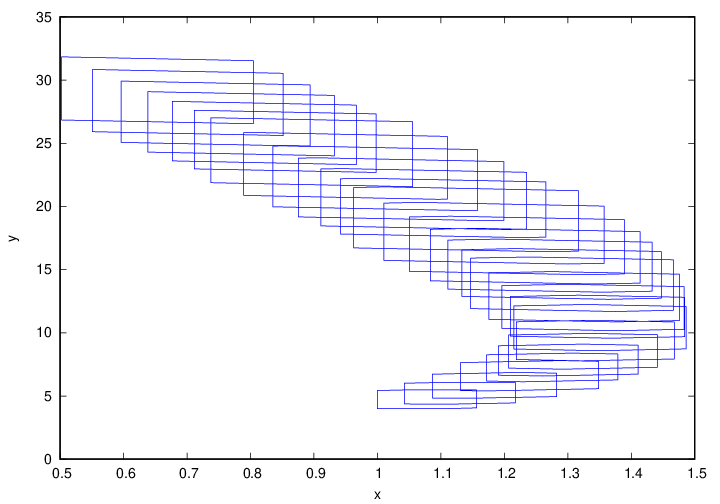

In [17]:
reach = compute_reach(v3)
reach.wplot('x', 'y')

In [18]:
list(zip(v3, v3s))

[(1.1?, 0.1?), (5.?, 1.?)]

In [19]:
sys.with_y0(v3, v3s)

System(R, (x, y), [[1.0000000000000000 .. 1.1000000000000001], [4 .. 5]], (0.29999999999999999?*(x - 0.80000000000000005?)*x*y - 0.59999999999999998?*(x - 1)*x, -2*(x - 0.80000000000000005?)*x*y - 0.050000000000000003?*(y + 1)*y), varmap=bidict({'x': x, 'y': y}))

In [20]:
System?

calling reach with y0 = [('[0.0000000000000000 .. 0.10000000000000001]', '[1.0000000000000000 .. 1.1000000000000001]'), ('[0.0000000000000000 .. 1.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]')]
ode in symbolic ring
str_odes = ['x + [-0.800000000000000, -0.800000000000000]*x*y*[0.300000000000000, 0.300000000000000] + x + [-1.00000000000000, -1.00000000000000]*x*[-0.600000000000000, -0.600000000000000]', 'x + [-0.800000000000000, -0.800000000000000]*x*y*[-2.00000000000000, -2.00000000000000] + y + [1.00000000000000, 1.00000000000000]*y*[-0.0500000000000000, -0.0500000000000000]']
run = True
_handle_initials called!
C = [0.0..0.1]
S = [1.0..1.1]
C = [0.0..1.0]
S = [4.0..5.0]
initials = [(0.1?, 1.1?), (1.?, 5.?)]


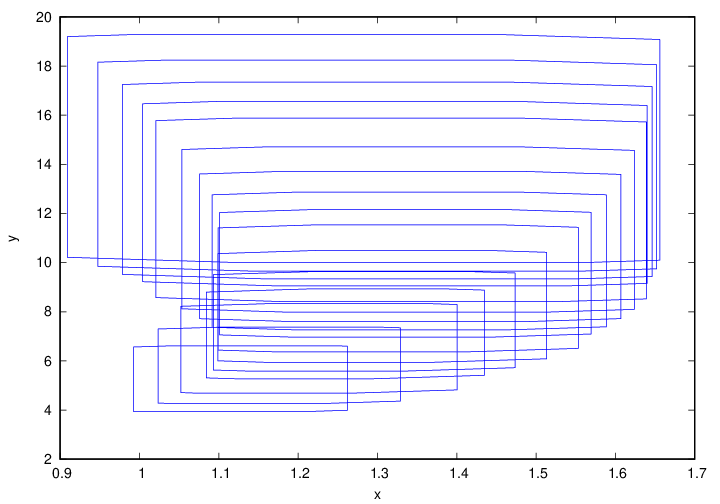

In [21]:
reach = compute_reach(v3, v3s)
reach.wplot('x', 'y')

## Simple signal

In [ ]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

In [ ]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5)
sig.plot()

In [ ]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
sig.plot()

In [ ]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True,
                    verbosity=3)
sig.plot()

In [ ]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5)
sig2.plot()

In [ ]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [ ]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7)

In [ ]:
reach.wplot('x', 'y')

### Polynomial plot

In [ ]:
reach.symbolic_composition = True

In [ ]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [ ]:
p1 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3))
p1

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf), verbosity=10)

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
J = RIF(1.5184870921717871, 1.5184870921717871)

In [ ]:
J.center()

In [ ]:
reach.eval_poly(Poly(P.p), J.center())

In [ ]:
reach.symbolic_composition = False

In [ ]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [ ]:
p2 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3),
                     color=['orange', 'magenta'])
p2

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
p1 + p2 + sig.to_domain(RIF(1, 3)).plot(aspect_ratio='automatic')

### $x \ge 1.15$

In [ ]:
q = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: x - 1.15 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
q.set_aspect_ratio(1/6)

In [ ]:
q + reach.sage_interval_plot('x', 'y',
                             poly=x - 1.15,
                             aspect_ratio='automatic')

In [ ]:
reach.symbolic_composition = True

In [ ]:
q1 = reach.sage_plot(x - 1.15, (0, 3.5))
q1

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
reach.symbolic_composition = False

In [ ]:
q2 = reach.sage_plot(x - 1.15, (0, 3.5),
                     color=['orange', 'magenta'])
q2

In [ ]:
roots = reach.roots(P.p, P.dpdt(vf))

In [ ]:
[root.str(style='brackets') for root in roots]

In [ ]:
q1 + q2 + sig2.to_domain(RIF(0, 3.5)).plot(aspect_ratio='automatic')

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])